# Exercise

# #1

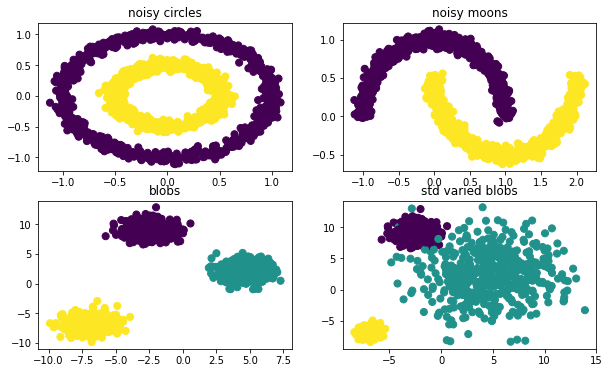

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

#Attempt to compare different clustering algorithms 
#Based on how they cluster, as well as time
#-K-means
#-Spectral clustering
#-Mini-Batch K-means
#-Gaussian mixture
#-DBSCAN - although I did not teach you, it is simply a density-based
#that treats nearby instance as neighbors.  It has
#two parameters (eps, min-points) that define the distance to considered as neighbors
#Attempt to play around with different parameters of each model
#Last but probably the most important, interpret the result (why
#this algorithm works well or otherwise)

def plot_clusters(ax, datasets, title):
    X, y = datasets
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax.set_title(title)

n_samples = 1500
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#normal blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

#std varied blobs
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)

datasets = [noisy_circles, noisy_moons, blobs, varied]
title = ['noisy circles', 'noisy moons', 
         'blobs', 'std varied blobs']
for i, axi in enumerate(ax.flat):
    plot_clusters(axi, datasets[i], title[i])


# Solution

# #1

/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


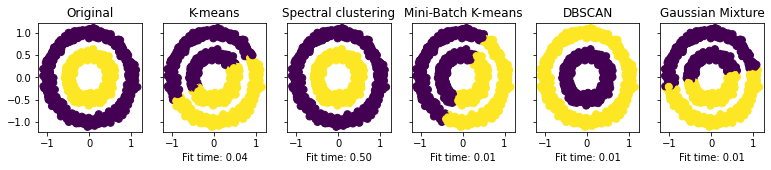

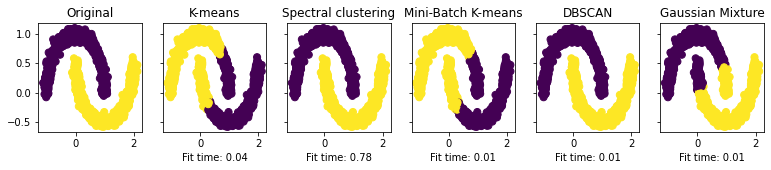

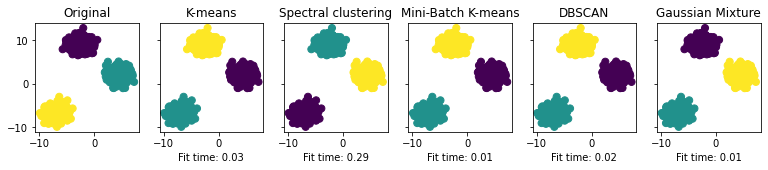

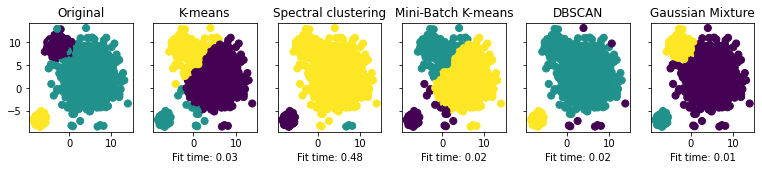

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

from time import time

#Attempt to compare different clustering algorithms 
#Based on how they cluster, as well as time
#-K-means
#-Spectral clustering
#-Mini-Batch K-means
#-Gaussian mixture
#-DBSCAN - although I did not teach you, it is simply a density-based
#that treats nearby instance as neighbors.  Definitely it has
#two parameters that define "what" proximity is considered neighbors
#here is the data

def plot_clusters(X, y, preds, models, fit_times, title):
    fig, ax = plt.subplots(1, 6, figsize=(13, 2), sharey=True)
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax[0].set_title("Original")
    for i, axi in enumerate(ax.flat[1:]):
        axi.scatter(X[:, 0], X[:, 1], c=preds[i], s=50, cmap='viridis')
        axi.set_xlabel(f"Fit time: {fit_times[i]:.2f}")
        axi.set_title(list(models.keys())[i])

n_samples = 1500

#noisy_circles
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
#noisy_moons
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

#normal blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)

#std varied blobs
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.5, 0.5],
                            random_state=42)

datasets = [noisy_circles, noisy_moons, blobs, varied]
title = ['noisy circles', 'noisy moons', 
         'blobs', 'std varied blobs']

#defining the models for noisy circle and noisy moon
kmeans = cluster.KMeans(n_clusters=2)
#by default, it uses rbf, but nearest neighbors work well if things are geometrically clustered
spectral = cluster.SpectralClustering(n_clusters = 2, affinity="nearest_neighbors")
mini_batch_kmeans = cluster.MiniBatchKMeans(n_clusters=2)
#eps define the distance considered as neighbors.  
#thus higher the values, the farther samples are considered as same clusters
#I found that if I put value more than .2, it will consider
#the inner and outer circle as same cluster
dbscan = cluster.DBSCAN(eps = .2)
gmm = mixture.GaussianMixture(n_components = 2)

models = {
    "K-means": kmeans,
    "Spectral clustering": spectral,
    "Mini-Batch K-means": mini_batch_kmeans,
    "DBSCAN": dbscan,
    "Gaussian Mixture": gmm
}

for ix, dataset in enumerate(datasets[:2]):
    X, y = dataset
    dataset_name = title[ix]
    preds = []
    fit_times = []
    for ix, (name, model) in enumerate(models.items()):
        start = time()
        model.fit(X)
        fit_times.append(time() - start)
        #for spectral clustering which has no "predict" func
        if hasattr(model, 'labels_'):
            preds.append(model.labels_)
        else:
            preds.append(model.predict(X))
    plot_clusters(X, y, preds, models, fit_times, dataset_name)
    

#defining the models for blobs
kmeans = cluster.KMeans(n_clusters=3)
spectral = cluster.SpectralClustering(n_clusters = 3)
mini_batch_kmeans = cluster.MiniBatchKMeans(n_clusters=3)

#set eps to be very high, so it can consume the whole cluster
#probably one of the biggest critic of DBSCAN is to
#choose the right eps....especially when you cannot visualize!
#perhaps using the same elbow method may work
dbscan = cluster.DBSCAN(eps = 2)
gmm = mixture.GaussianMixture(n_components = 3)

models = {
    "K-means": kmeans,
    "Spectral clustering": spectral,
    "Mini-Batch K-means": mini_batch_kmeans,
    "DBSCAN": dbscan,
    "Gaussian Mixture": gmm
}

for ix, dataset in enumerate(datasets[2:]):
    X, y = dataset
    dataset_name = title[ix]
    preds = []
    fit_times = []
    for ix, (name, model) in enumerate(models.items()):
        start = time()
        model.fit(X)
        fit_times.append(time() - start)
        #for spectral clustering which has no "predict" func
        if hasattr(model, 'labels_'):
            preds.append(model.labels_)
        else:
            preds.append(model.predict(X))
    plot_clusters(X, y, preds, models, fit_times, dataset_name)

### Interpretation

I think the first lesson learned is that there are really no one best algorithms.  Each has its own place.  Some comments:

- **K-means** perform only well in equal-sized blobs.  It is also important to note that most data in real-world is rarely a equal-sized blobs, thus k-means can be at most a good baseline algorithms for clustering
- **Mini-Batch K-means** is simply a much faster variant of K-means, thus there is NO reason at all to use K-means
- Note that **Spectral clustering** support many kernels. By default it uses rbf.  For moons and circles, it makes more sense to use nearest neighbors as geodesic distance will work much better than euclidean distances.   One big big drawback of spectral clustering is its fit time!  It's almost 50 times slower than other algorithms!
- **DBSCA**N shines when cluster are continous, such as the moon or the two circles.  On the other hand, it fails terribly on last case, since it consider any nearby neighbors within eps distance to be the same cluster.  Perhaps adjusting eps would give better result - but that's another drawback!  Deciding the right eps is not easy given there is really no one metric to decide the goodness-of-fit for clustering
- **Gaussian mixture** is a gaussian-based distribution algorithm and surprisinly is the only one algorithm able to beat the last dataset.  But of course, since it's gaussian, it remains a spherical/eclipse shape and when we give only 2 components, it is like overlaying two eclipse and thus fail terribly on the first two datasets.